# Core Operations

# overview of the coordinate system


# As I mentioned, an image is represented as a grid of pixels.Imagine our grid as a piece of graph paper. Using this graph paper, the point ( 0, 0 ) corresponds to the upper left corner of the image. As we move down and to the right, both the x and y values increase.

# 1. Basic Operation on Images

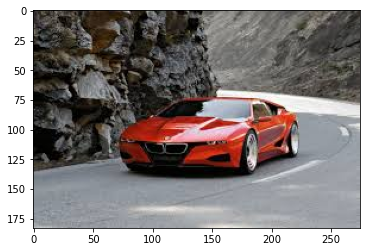

In [12]:
import cv2       # importing cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('bmw13.jpg')   # Reading an image
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# cv2.imshow('image', image)         # Displaying an Image
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Shape of image

In [13]:
image.shape

(183, 275, 3)

In [14]:
''' here we grab the pixel located at ( 100, 200 )
    This pixel is represented as a tuple.
    '''
(b ,g, r) = image[100,200]

In [15]:
print("pixel at (100,200) -  Blue: {}, Green: {} , Red:{}" .format(b,g,r))

pixel at (100,200) -  Blue: 83, Green: 88 , Red:137


In [16]:
''' NumPy makes it easy to access pixel values, it also
    makes it easy to manipulate pixel values
'''
image[100,200] = (0,0,255)
( b, g, r) = image[100,200]
print("pixel at (100,200) -  Blue: {}, Green: {} , Red:{}" .format(b,g,r))

pixel at (100,200) -  Blue: 0, Green: 0 , Red:255


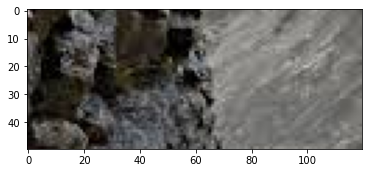

In [17]:
'''we can also useNumPy’s array slicing capabilities
   to access larger rectangular portions of the image
   
     Here img takes four argument 
      Y1  -- Up  
      Y2  -- Down
      X1  -- Left
      X2  -- Right
   
'''
sl=image[0:50,80:200]
sl=cv2.cvtColor(sl, cv2.COLOR_BGR2RGB)
plt.imshow(sl)
plt.show()
# cv2.imshow('sl', sl)         # Displaying an Image
# cv2.waitKey(0)
# cv2.destroyAllWindows()

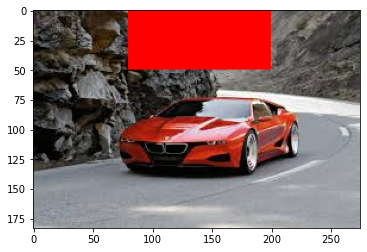

In [18]:
m=image.copy()
m[0:50,80:200]=(0,0,255)
sl=m[0:50,80:200]
# sl=cv2.cvtColor(sl, cv2.COLOR_BGR2RGB)
# plt.imshow(sl)
# plt.show()

# cv2.imshow('sl', sl)
# cv2.waitKey(0)
# cv2.imshow('m', m)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

m = cv2.cvtColor(m, cv2.COLOR_BGR2RGB)
plt.imshow(m)
plt.show()

# Splitting and Merging Image Channels


we can also get the individual Blue Green and Red channels of an image using cv2.split() function
and then we can merge them back using cv2.merge()

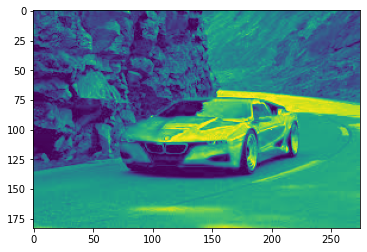

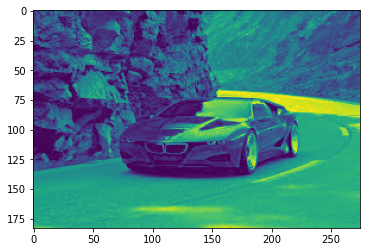

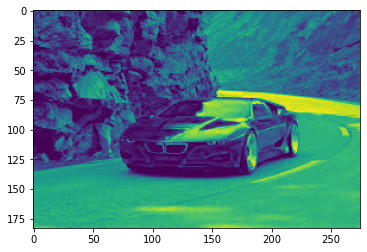

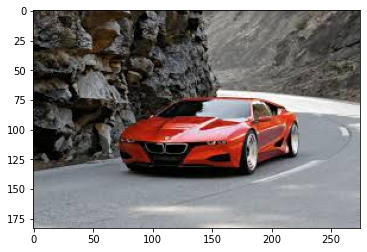

In [19]:
# Splitting
ig = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
(B, G, R) = cv2.split(ig)

plt.imshow(B)
plt.show()
plt.imshow(G)
plt.show()
plt.imshow(R)
plt.show()
# cv2.imshow('Blue', B)
# cv2.imshow('Green', G)
# cv2.imshow('Red', R)
# # Merging
merged = cv2.merge((B, G, R))
# cv2.imshow('merged', merged)
plt.imshow(merged)
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 2. Arithmetic Operations on Images

# Image Addition

we can add two images by OpenCV function, cv2.add()
Both images should be of same depth and type

In [21]:
''' Image Preprocessing
'''
img1 = cv2.imread('r3.png')      # Image reading
img1 = cv2.resize(img1, (347,350)) #  Image resizing
img2 = cv2.imread('image3.jpg')
img2 = cv2.resize(img2, (347,350))


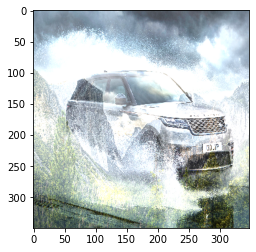

In [22]:
''' Adding Image
'''
add= cv2.add(img1,img2)
add= cv2.cvtColor(add , cv2.COLOR_BGR2RGB)
plt.imshow(add)
plt.show()
# cv2.imshow('add', add)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Image Blending
This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency.

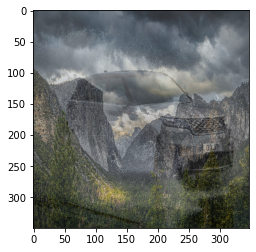

In [23]:
''' Here I took two images to blend them together.
    First image is given a weight of 0.7 and second image is given 0.3.
    cv2.addWeighted() applies following equation on the image.
    
    

                dst = α*img1 + β*img2 + γ
                

'''
dst =cv2.addWeighted(img1,0.3,img2,0.7,0)
dst=cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.show()
# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Addition and Subtraction

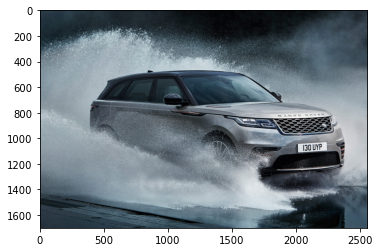

In [24]:
image= cv2.imread('r3.png')
# cv2.imshow('img', img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
''' We need an array to be added to or subtracted from Images
    this array needs to be the same size of original image
'''
m = np.ones(image.shape, dtype = 'uint8') * 75

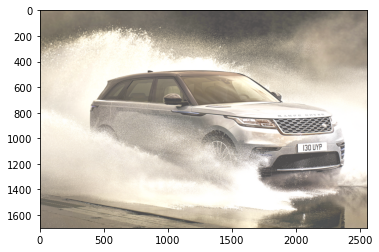

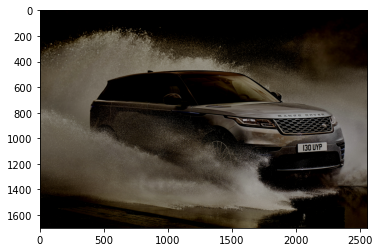

In [25]:
add =cv2.add(image,m)
add=cv2.cvtColor(add, cv2.COLOR_BGR2RGB)
plt.imshow(add)
plt.show()

sub=cv2.subtract(image,m)
sub=cv2.cvtColor(sub , cv2.COLOR_BGR2RGB)
plt.imshow(sub)
plt.show()

# 3. Bitwise Operations
# AND, OR, XOR, and NOT
Bitwise operations operate in a binary manner and are represented as grayscale images.
A given pixel is turned “off” if it has a value of zero, and it is turned “on” if the
pixel has a value greater than zero.

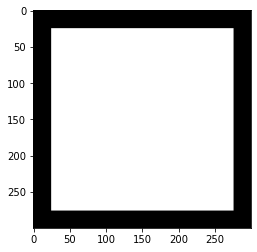

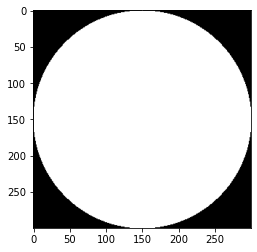

In [26]:
import cv2
import numpy as np

rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), (255, 255, 255), -1)
# cv2.imshow("Rectangle", rectangle)
rectangle = cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB)
plt.imshow(rectangle)
plt.show()


circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, (255, 255, 255), -1)
circle = cv2.cvtColor(circle, cv2.COLOR_BGR2RGB)
plt.imshow(circle)
plt.show()
# cv2.imshow("Circle", circle)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### 1. AND: A bitwise AND is true if and only if both pixelsare greater than zero.
### 2. OR: A bitwise OR is true if either of the two pixelsare greater than zero.
### 3. XOR: A bitwise XOR is true if and only if either of the two pixels are greater than zero, but not both.
### 4. NOT: A bitwise NOT inverts the “on” and “off” pixelsin an image.


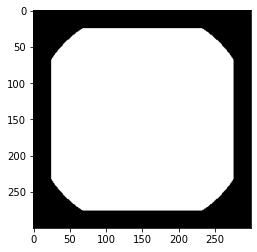

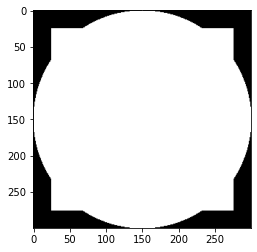

In [27]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
# cv2.imshow("AND", bitwiseAnd)
bitwiseAnd = cv2.cvtColor(bitwiseAnd, cv2.COLOR_BGR2RGB)
plt.imshow(bitwiseAnd)
plt.show()

bitwiseOr = cv2.bitwise_or(rectangle, circle)
bitwiseOr= cv2.cvtColor(bitwiseOr, cv2.COLOR_BGR2RGB)
plt.imshow(bitwiseOr)
plt.show()

# cv2.imshow("OR", bitwiseOr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()